## End-to-End

In [1]:
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa21_male2.csv')
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [3]:
df["Value"].unique()

array(['€625K', '€600K', '€1.1M', '€0', '€5.5M', '€725K', '€2.8M', '€1K',
       '€400K', '€120K', '€500K', '€190K', '€2.2M', '€350K', '€1.3M',
       '€1.5M', '€275K', '€325K', '€900K', '€80K', '€3M', '€35K', '€975K',
       '€425K', '€850K', '€45K', '€3.2M', '€1.2M', '€50K', '€825K',
       '€130K', '€1.8M', '€575K', '€2.1M', '€1.6M', '€375K', '€2.7M',
       '€550K', '€1.7M', '€3.4M', '€150K', '€300K', '€4.2M', '€5M',
       '€1.9M', '€6.5M', '€875K', '€15.5M', '€210K', '€450K', '€1M',
       '€775K', '€1.4M', '€100K', '€240K', '€650K', '€950K', '€6M',
       '€3.9M', '€46M', '€30K', '€2.5M', '€4.1M', '€15K', '€7.5M',
       '€4.3M', '€25K', '€9.5M', '€3.1M', '€90K', '€2.4M', '€675K',
       '€475K', '€2.3M', '€925K', '€4.7M', '€4.5M', '€230K', '€2M',
       '€70K', '€7M', '€170K', '€250K', '€220K', '€2.6M', '€2.9M',
       '€180K', '€8.5M', '€140K', '€3K', '€10K', '€200K', '€13M', '€750K',
       '€3.7M', '€110K', '€700K', '€3.6M', '€29.5M', '€3.5M', '€3.8M',
       '€16.5M', '€800

In [4]:
df['Value'] = df['Value'].replace('\u20AC','',regex=True).str.replace('K', '000').str.replace('.1M', '100000').str.replace('.2M', '200000').str.replace('.3M', '300000').str.replace('.4M', '400000').str.replace('.5M', '500000').str.replace('.6M', '600000').str.replace('.7M', '700000').str.replace('.8M', '800000').str.replace('.9M', '900000').str.replace('M', '.0')
df["Value"] = df["Value"] = pd.to_numeric(df["Value"]).astype(int)
df["Value"].unique()


array([   625000,    600000,   1100000,         0,   5500000,    725000,
         2800000,      1000,    400000,    120000,    500000,    190000,
         2200000,    350000,   1300000,   1500000,    275000,    325000,
          900000,     80000,         3,     35000,    975000,    425000,
          850000,     45000,   3200000,   1200000,     50000,    825000,
          130000,   1800000,    575000,   2100000,   1600000,    375000,
         2700000,    550000,   1700000,   3400000,    150000,    300000,
         4200000,         5,   1900000,   6500000,    875000,  15500000,
          210000,    450000,         1,    775000,   1400000,    100000,
          240000,    650000,    950000,         6,   3900000,     30000,
         2500000,   4100000,     15000,   7500000,   4300000,     25000,
         9500000,   3100000,     90000,   2400000,    675000,    475000,
         2300000,    925000,   4700000,   4500000,    230000,         2,
           70000,         7,    170000,    250000, 

,Name,Age,Value
9331,K. Mbappé,21,105500000


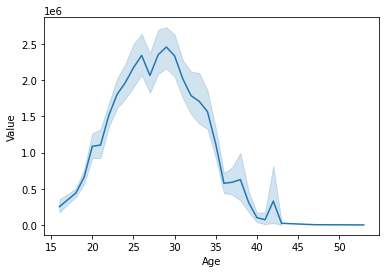

In [5]:
fifa_age_vs_value = df[['Name','Age', 'Value']]
sns.lineplot(data=fifa_age_vs_value, x="Age", y="Value")
sorted(fifa_age_vs_value['Value'].unique())
fifa_age_vs_value[fifa_age_vs_value['Value']==105500000]

In [6]:
df['Hits'] = df['Hits'].str.replace('K', '')
df["Hits"] = pd.to_numeric(df["Hits"])

In [7]:
data = df[['BP', "Finishing", "Heading Accuracy", "Volleys", "Shot Power", "Jumping", "Dribbling", "Ball Control", "Acceleration", "Sprint Speed", "Long Shots", "Vision",'Name', "Hits"]]
data = data.dropna()
data.sort_values(by='Hits', ascending=False)

,BP,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Name,Hits
13981,LM,70,54,44.0,68,57.0,80,82,82,81,76,78.0,D. Kulusevski,974.0
14794,LW,69,62,66.0,67,83.0,75,73,89,88,69,66.0,K. Adeyemi,961.0
11329,LM,67,57,55.0,73,77.0,79,80,80,81,65,78.0,Cucurella,959.0
14652,LW,74,68,61.0,68,43.0,76,75,87,86,60,65.0,Gabriel Martinelli,957.0
15673,CAM,68,59,70.0,72,54.0,77,74,84,80,64,70.0,Reinier,934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,RM,83,68,73.0,90,72.0,87,85,89,93,81,82.0,M. Rashford,1.0
10236,RM,75,44,76.0,84,48.0,83,79,95,94,80,72.0,I. Sarr,1.0
5996,RM,66,40,52.0,78,79.0,92,83,97,96,65,69.0,Adama Traoré,1.0
11207,RM,68,50,70.0,73,75.0,88,85,95,95,68,73.0,Vinícius Jr.,1.0


In [8]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Dtype  
---   ------            -----  
 0    ID                int64  
 1    Name              object 
 2    Age               int64  
 3    OVA               int64  
 4    Nationality       object 
 5    Club              object 
 6    BOV               int64  
 7    BP                object 
 8    Position          object 
 9    Player Photo      object 
 10   Club Logo         object 
 11   Flag Photo        object 
 12   POT               int64  
 13   Team & Contract   object 
 14   Height            object 
 15   Weight            object 
 16   foot              object 
 17   Growth            int64  
 18   Joined            object 
 19   Loan Date End     object 
 20   Value             int32  
 21   Wage              object 
 22   Release Clause    object 
 23   Contract          object 
 24   Attacking         int64  
 25   Crossing          in

In [9]:
df.describe()

,ID,Age,OVA,BOV,POT,Growth,Value,Attacking,Crossing,Finishing,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,16384.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,1.661059e+06,258.537752,51.621314,47.956672,...,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715,29.591449
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,3.809025e+06,72.255687,17.875715,19.391547,...,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260,78.177995
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,0.000000e+00,33.000000,6.000000,3.000000,...,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000,1.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,2.400000e+05,232.000000,41.000000,33.000000,...,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,4.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,6.000000e+05,271.000000,56.000000,52.000000,...,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,7.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,1.400000e+06,306.000000,65.000000,64.000000,...,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,19.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,1.055000e+08,437.000000,94.000000,95.000000,...,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000,974.000000


In [10]:
data_fifa = df[["Finishing", "Heading Accuracy", "Volleys", "Shot Power", "Jumping", "Dribbling", "Ball Control", "Acceleration", "Sprint Speed", "Long Shots", "Vision", "Hits"]]
data_fifa

,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
0,50,59,58.0,74,68.0,73,71,68,74,68,66.0,4.0
1,64,61,68.0,75,54.0,69,71,56,50,71,73.0,4.0
2,64,41,75.0,72,58.0,79,78,48,42,69,74.0,11.0
3,70,60,NaN,63,NaN,68,77,59,62,59,NaN,3.0
4,69,54,79.0,67,40.0,85,90,61,56,70,93.0,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,23,66,26.0,48,70.0,44,56,52,55,28,29.0,NaN
17121,43,50,41.0,51,62.0,57,54,61,63,48,53.0,NaN
17122,34,53,34.0,28,61.0,52,47,66,61,37,45.0,NaN
17123,26,52,23.0,51,72.0,55,57,72,70,33,56.0,NaN


In [11]:
data_fifa = data_fifa.dropna()
data_fifa

,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
0,50,59,58.0,74,68.0,73,71,68,74,68,66.0,4.0
1,64,61,68.0,75,54.0,69,71,56,50,71,73.0,4.0
2,64,41,75.0,72,58.0,79,78,48,42,69,74.0,11.0
4,69,54,79.0,67,40.0,85,90,61,56,70,93.0,149.0
5,53,42,57.0,71,70.0,67,62,90,91,49,58.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16379,43,33,38.0,50,40.0,67,55,78,73,34,40.0,5.0
16380,22,56,30.0,51,68.0,30,34,55,55,27,30.0,3.0
16381,71,62,67.0,60,66.0,68,66,83,78,66,60.0,291.0
16382,35,46,37.0,48,57.0,56,56,64,64,39,48.0,4.0


In [12]:
corr_data = data_fifa.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')
correlations_matrix

,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
Finishing,1.000000,0.274572,0.870916,0.741093,0.040753,0.764469,0.721050,0.494588,0.471799,0.840038,0.662817,0.219529
Heading Accuracy,0.274572,1.000000,0.303080,0.338855,0.440424,0.177703,0.314823,-0.040534,0.049860,0.288675,0.112419,0.166079
Volleys,0.870916,0.303080,1.000000,0.779044,0.064012,0.757341,0.740226,0.441566,0.412941,0.844858,0.683955,0.205898
Shot Power,0.741093,0.338855,0.779044,1.000000,0.124363,0.687042,0.717164,0.307457,0.303822,0.844528,0.676450,0.272481
Jumping,0.040753,0.440424,0.064012,0.124363,1.000000,0.037642,0.104046,0.082513,0.122769,0.075537,0.004072,0.099939
Dribbling,0.764469,0.177703,0.757341,0.687042,0.037642,1.000000,0.901688,0.630341,0.579884,0.786164,0.774622,0.352869
Ball Control,0.721050,0.314823,0.740226,0.717164,0.104046,0.901688,1.000000,0.478324,0.438662,0.792050,0.797062,0.381454
Acceleration,0.494588,-0.040534,0.441566,0.307457,0.082513,0.630341,0.478324,1.000000,0.907547,0.424339,0.371183,0.201419
Sprint Speed,0.471799,0.049860,0.412941,0.303822,0.122769,0.579884,0.438662,0.907547,1.000000,0.391470,0.316474,0.202361
Long Shots,0.840038,0.288675,0.844858,0.844528,0.075537,0.786164,0.792050,0.424339,0.391470,1.000000,0.756540,0.228501


In [13]:
corr_data = df.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')
correlations_matrix['Hits'].sort_values()

Age                -0.097650
GK Kicking         -0.051469
GK Reflexes        -0.050038
Goalkeeping        -0.044570
GK Handling        -0.038789
GK Positioning     -0.029495
GK Diving          -0.028356
ID                 -0.020262
Strength            0.063000
Growth              0.097335
Jumping             0.099939
Sliding Tackle      0.122076
Balance             0.128032
Interceptions       0.130194
DEF                 0.134926
Standing Tackle     0.139225
Defending           0.139994
Marking             0.143012
Penalties           0.154256
FK Accuracy         0.161391
Heading Accuracy    0.164212
Aggression          0.165561
PHY                 0.168359
Stamina             0.196490
Acceleration        0.200788
Agility             0.201387
Sprint Speed        0.201423
Volleys             0.205898
Finishing           0.217607
Long Shots          0.226485
PAC                 0.228781
Curve               0.239822
SHO                 0.240965
Crossing            0.241630
Long Passing  

In [ ]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
X = data_fifa.drop(['Hits'], axis=1)
y = data_fifa['Hits']


X = sm.add_constant(X)

model = sm.OLS(y,X,missing='drop').fit()

model.summary()

In [ ]:
X = data_fifa.drop(['Hits'], axis=1)
y = data_fifa['Hits']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

In [ ]:
residuals = y - predictions

plot = sns.scatterplot(y,residuals)
plot.set(xlabel='Hits', ylabel='residuals')
plt.show()

In [ ]:
sns.regplot(y, predictions)

In [ ]:
df.insert(2, "Years Played", df['Age']-16, True)
df

In [ ]:
data_fifa1 = df[['BP','Years Played', "Finishing", "Heading Accuracy", "Volleys", "Shot Power", "Jumping", "Dribbling", "Ball Control", "Acceleration", "Sprint Speed", "Long Shots", "Vision", "Hits"]]
data_fifa1

In [ ]:
data_fifa1['BP'].unique()

In [ ]:
excl_pos = ['LWB','CB','GK','RWB','LB','RB']
data_fifa1 = data_fifa1[~data_fifa1['BP'].isin(excl_pos)]
data_fifa1

In [ ]:
data_fifa1 = data_fifa1.dropna()
data_fifa1 = data_fifa1.drop(['BP'], axis=1)
data_fifa1

In [ ]:
corr_data1 = data_fifa1.select_dtypes([np.number])
correlations_matrix1 = corr_data1.corr(method='spearman')
mask = np.zeros_like(correlations_matrix1)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix1, mask=mask, annot=True)
plt.show()

In [ ]:
X = data_fifa1.drop(['Hits'], axis=1)
y = data_fifa1['Hits']


X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

In [ ]:
X = data_fifa1.drop(['Hits'], axis=1)
y = data_fifa1['Hits']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

In [ ]:
residuals = y - predictions

plot = sns.scatterplot(y,residuals)
plot.set(xlabel='Hits', ylabel='residuals')
plt.show()